In [2]:
#Install Python packages

! pip install pyreadstat
! pip install scikit-plot
#! pip install keras-tuner
#! pip install parfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Load Python packages
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier #RF
from sklearn.model_selection import train_test_split
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
import pyreadstat
%matplotlib inline

#ANN (not utilized anymore)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.utils import np_utils
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD, RMSprop
import seaborn as sns
import tensorflow as tf
from keras import losses
from sklearn.utils import shuffle

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

#Balancing
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.utils import shuffle

In [4]:
#Mount and load dataset

from google.colab import drive
drive.mount('/content/drive')

df, meta = pyreadstat.read_sav("/content/drive/MyDrive/Thyroid_data.sav")
type(df)
print(df.info())

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tsh1                   1800 non-null   float64
 1   ft41                   1800 non-null   float64
 2   tpo1                   1800 non-null   float64
 3   Vermoeid_12            1800 non-null   float64
 4   Doorslaapprob_12       1800 non-null   float64
 5   Vergeetachtig_12       1800 non-null   float64
 6   Concentratie_12        1800 non-null   float64
 7   Benauwd_12             1800 non-null   float64
 8   Krampbenen_12          1800 non-null   float64
 9   Vochthandvoet_12       1800 non-null   float64
 10  Vocht_12               1800 non-null   float64
 11  Pijnspieren_12         1800 non-null   float64
 12  Pijngewrichten_12      1800 non-null   float64
 13  Piekeren_12            1800 non-null   float64
 14  Wisselendestemming_12  1800 no

In [5]:
df.rename({'Vermoeid_12': 'General fatigue', 'Doorslaapprob_12': 'Sleeping problems',
                     'Vergeetachtig_12': 'Forgetfulness', 'Concentratie_12':'Difficulties concentrating',
                     'Benauwd_12':'Shortness of breath', 'Krampbenen_12':'Leg cramps',
                     'Vochthandvoet_12':'Fluid retention in hands/feet', 'Vocht_12':'General fluid retention',
                     'Pijnspieren_12':'Muscle ache', 'Pijngewrichten_12':'Aching or stiff joints',
                     'Piekeren_12':'Worrying', 'Wisselendestemming_12':'Mood changes'}, axis=1)

,tsh1,ft41,tpo1,General fatigue,Sleeping problems,Forgetfulness,Difficulties concentrating,Shortness of breath,Leg cramps,Fluid retention in hands/feet,General fluid retention,Muscle ache,Aching or stiff joints,Worrying,Mood changes,group
0,3.34,10.10,11.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,6.0
1,1.05,13.15,10.0,4.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0,2.0,1.0
2,1.06,17.53,8.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,1.0
3,1.35,16.19,5.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.30,15.00,5.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,1.90,14.00,12.0,4.0,3.0,2.0,1.0,3.0,0.0,3.0,3.0,0.0,1.0,1.0,4.0,1.0
1796,0.42,18.00,10.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0
1797,1.80,14.00,10.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1798,1.80,11.00,110.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0


Balancing the datasets

In [6]:
#Splitting target and predictors

df2 = df.drop(['tsh1', 'ft41', 'tpo1'], axis=1)
df3 = df2.copy()
df_copy = df2.drop(['group'], axis=1).copy()
df2 = df2.to_numpy() #Dataset with only symptoms
df2.shape
X = df2[:,:-1]
y = df2[:,-1]
print(X.shape, y.shape)
#X = df2.drop('group', axis=1)
#y = df2['group']

(1800, 12) (1800,)


array([[1., 0., 2., ..., 0., 2., 6.],
       [4., 2., 2., ..., 3., 2., 1.],
       [4., 1., 1., ..., 2., 3., 1.],
       ...,
       [3., 0., 2., ..., 0., 1., 1.],
       [3., 0., 0., ..., 1., 1., 6.],
       [0., 0., 3., ..., 0., 1., 1.]])

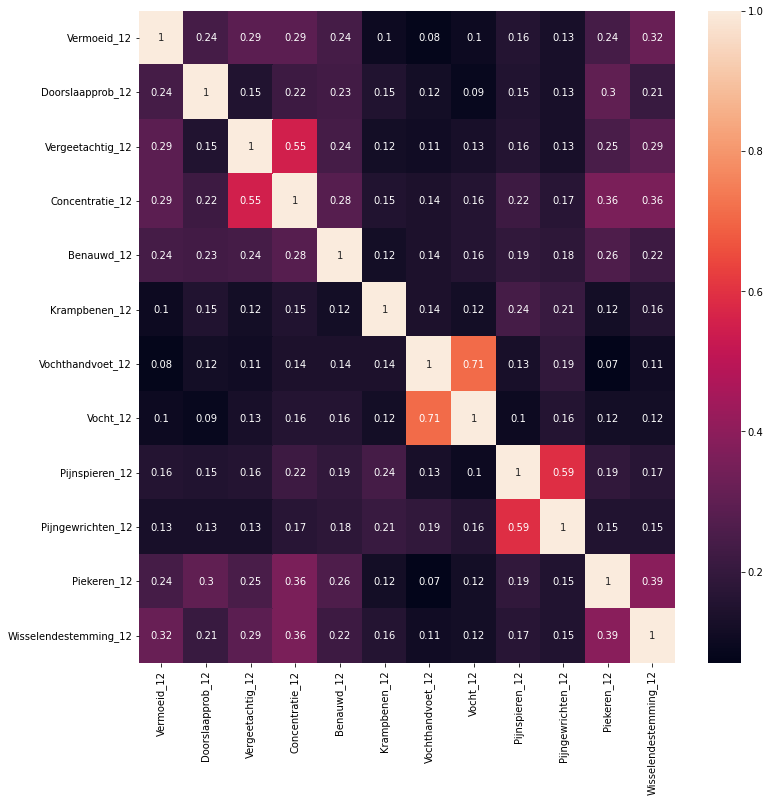

In [7]:
#Correlation matrix

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = df_copy.corr().round(2)
plt.figure(figsize=(12,12))
sn.heatmap(corr_matrix, annot=True)
plt.savefig('name_heatmap.png') 
plt.show()

In [8]:
#Data balancing using combination

from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTENC, SMOTE, RandomOverSampler #For categorical data
categories=[0,2,3,4,5,6,7,8,9,10,11]
smote_enc = SMOTENC(random_state=2, categorical_features=categories)
smote_enn = SMOTEENN(random_state=0)
smote_tom = SMOTETomek(random_state=1) #Choice went out to SMOTETomek (best performance out of all synthesized sets)
smote = SMOTE(random_state=2)
random = RandomOverSampler(random_state=3)

X_combi1, y_combi1 = smote_tom.fit_resample(X, y.ravel())
X_combi2, y_combi2 = smote_enn.fit_resample(X, y.ravel())
X_smote, y_smote = smote.fit_resample(X, y.ravel())
X_random, y_random = random.fit_resample(X, y.ravel())
X_cat, y_cat = smote_enc.fit_resample(X, y.ravel())

#X_cat = X_combi1.to_numpy()
#X_combi1 = X_combi1.drop('tpo1', axis=1)
#X_combi1 = X_combi1.to_numpy()

print("SMOTETomek: ", sorted(Counter(y_combi1).items()), X_combi1.shape, y_combi1.shape)
print("SMOTEENN: ",sorted(Counter(y_combi2).items()), X_combi2.shape, y_combi2.shape)
print("Random: ",sorted(Counter(y_random).items()), X_random.shape, y_random.shape)
print("SMOTE ENC: ", sorted(Counter(y_cat).items()), X_cat.shape, y_cat.shape)

SMOTETomek:  [(1.0, 1614), (2.0, 1614), (3.0, 1613), (4.0, 1605), (5.0, 1605), (6.0, 1613), (7.0, 1614)] (11278, 12) (11278,)
SMOTEENN:  [(1.0, 677), (2.0, 1590), (3.0, 1573), (4.0, 1391), (5.0, 1559), (6.0, 1532), (7.0, 1532)] (9854, 12) (9854,)
Random:  [(1.0, 1614), (2.0, 1614), (3.0, 1614), (4.0, 1614), (5.0, 1614), (6.0, 1614), (7.0, 1614)] (11298, 12) (11298,)
SMOTE ENC:  [(1.0, 1614), (2.0, 1614), (3.0, 1614), (4.0, 1614), (5.0, 1614), (6.0, 1614), (7.0, 1614)] (11298, 12) (11298,)


In [ ]:
type(X_cat)

numpy.ndarray

In [ ]:
#Data to test on NA in R (also tried with SMOTEENC)

from google.colab import drive
drive.mount('/content/drive')

columns = ['Vermoeid_12',
'Doorslaapprob_12',
'Vergeetachtig_12',
'Concentratie_12',
'Benauwd_12',
'Krampbenen_12',
'Vochthandvoet_12',
'Vocht_12',
'Pijnspieren_12',
'Pijngewrichten_12',
'Piekeren_12',
'Wisselendestemming_12']

df = pd.DataFrame(X_combi1, columns = columns)
targets = pd.DataFrame(y_combi1)
df['group'] = targets
df

#df.to_csv('data_enc.csv')
#!cp data_enc.csv "drive/My Drive/"
#!cp targets.csv "drive/My Drive/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Vermoeid_12,Doorslaapprob_12,Vergeetachtig_12,Concentratie_12,Benauwd_12,Krampbenen_12,Vochthandvoet_12,Vocht_12,Pijnspieren_12,Pijngewrichten_12,Piekeren_12,Wisselendestemming_12,group
0,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,0.0,0.000000,1.000000,1.0,0.000000,2.000000,5
1,4.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.0,0.000000,2.000000,0.0,3.000000,2.000000,0
2,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2.000000,3.000000,0
3,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0
4,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11273,3.941433,1.058567,2.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.058567,0.0,0.941433,1.000000,6
11274,2.130580,1.869420,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.130580,0.869420,6
11275,2.000000,0.000000,1.000000,1.000000,1.050243,0.000000,0.0,0.949757,0.000000,0.0,0.050243,0.100485,6
11276,1.000000,0.559991,0.559991,0.559991,0.000000,0.559991,0.0,0.000000,0.000000,0.0,0.000000,0.000000,6


In [21]:
#Categorically encoding the data

le = LabelEncoder()
#y_combi1 = le.fit_transform(y_combi1)
#y_combi1.shape

y_combi1 = le.fit_transform(y_combi1)
y_combi1.shape

(11278,)

In [22]:
#Data splitting + encoding
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
sss.get_n_splits(X, y)
print(sss)

for train_index, test_index in sss.split(X_combi1, y_combi1):
  X_train, X_test = X_combi1[train_index], X_combi1[test_index]
  y_train, y_test = y_combi1[train_index], y_combi1[test_index]



#Split train - (val + test)
#X_train, X_, y_train, y_ = train_test_split(X_combi1, y_combi1, test_size = 0.4, random_state = 1, stratify=y_combi1)
#Split val + test
#X_test, X_val, y_test, y_val = train_test_split(X_, y_, test_size = 0.5, random_state = 1, stratify=y_)



print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print("Train targets:", sorted(Counter(y_train).items()))
print("Test targets:", sorted(Counter(y_test).items()))
print(np.unique(y_train))

StratifiedShuffleSplit(n_splits=10, random_state=2, test_size=0.2,
            train_size=None)
(9022, 12) (2256, 12) (9022,) (2256,)
Train targets: [(0, 1291), (1, 1291), (2, 1290), (3, 1284), (4, 1284), (5, 1291), (6, 1291)]
Test targets: [(0, 323), (1, 323), (2, 323), (3, 321), (4, 321), (5, 322), (6, 323)]
[0 1 2 3 4 5 6]


In [23]:
#Data preprocessing (cont)

#oe = OrdinalEncoder()

#oe.fit_transform(X_train)
#oe.fit_transform(X_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

Logistic Regression

In [ ]:
#Base Logistic Regression model

import random
random.seed(10)

baseLR = LogisticRegression(multi_class='multinomial')
baseLR.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

0.8972222222222223
ROC-AUC LR:  0.47817026459879475


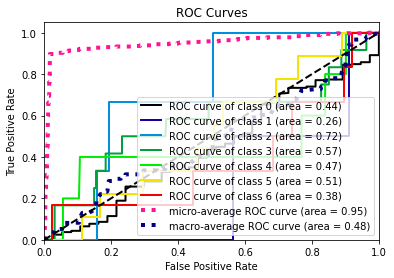

              precision    recall  f1-score   support

     Healthy       0.90      1.00      0.95       323
       OHypo       0.00      0.00      0.00         2
      OHyper       0.00      0.00      0.00         3
       SHypo       0.00      0.00      0.00        12
      SHyper       0.00      0.00      0.00         5
       IHypo       0.00      0.00      0.00         9
      IHyper       0.00      0.00      0.00         6

    accuracy                           0.90       360
   macro avg       0.13      0.14      0.14       360
weighted avg       0.81      0.90      0.85       360

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
#Prediction and performance
from sklearn.metrics import roc_auc_score

random.seed(11)

predictions1 = baseLR.predict(X_test) #predictions
y_score1 = baseLR.predict_proba(X_test)
score1 = baseLR.score(X_test, y_test)
print(score1)

#Print ROC score
print("ROC-AUC LR: ",roc_auc_score(y_test, y_score1, multi_class='ovr'))
plot_roc(y_test, y_score1)
plt.savefig('ROCtunedLR.png')
plt.show()

target_names = ['Healthy', 'OHypo', 'OHyper', 'SHypo', 'SHyper', 'IHypo', 'IHyper']
print(classification_report(y_test, predictions1, target_names=target_names))

LRtuned = classification_report(y_test, predictions1, target_names=target_names, output_dict=True)
LRtuned = pd.DataFrame(LRtuned).transpose()

print(np.unique(predictions1)) #https://elitedatascience.com/imbalanced-classes (Check to find out how to see how many classes are predicted)

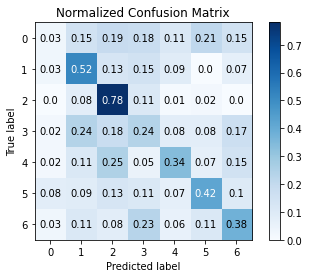

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predictions1, normalize=True)
plt.savefig('CMtunedLR.png')
plt.show()

In [ ]:
#Base report download

LRtuned.to_csv('LRtuned.csv')
!cp LRtuned.csv "drive/My Drive/"

Random Forest

In [24]:
#Base RF model
import random
random.seed(13)

rf=RandomForestClassifier()
    
#rf=RandomForestClassifier(
#criterion='gini',
#max_features = 'sqrt', min_samples_split = 4, 
#n_estimators = 200) #(83%)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,y_train)

y_pred2=rf.predict(X_test)
y_score2 = rf.predict_proba(X_test)

In [25]:
#@title Default title text
from sklearn.metrics import roc_auc_score, accuracy_score
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2) * 100)
print("ROC-AUC RF:", roc_auc_score(y_test, y_score2, multi_class='ovr'))

Accuracy: 83.55496453900709
ROC-AUC RF: 0.9847641602717728


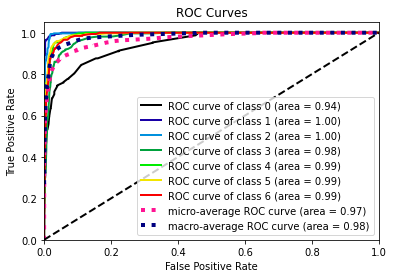

              precision    recall  f1-score   support

     Healthy       0.98      0.26      0.41       323
       OHypo       0.84      0.99      0.91       323
      OHyper       0.87      0.98      0.92       323
       SHypo       0.81      0.80      0.80       321
      SHyper       0.89      0.94      0.92       321
       IHypo       0.83      0.92      0.87       322
      IHyper       0.76      0.96      0.85       323

    accuracy                           0.84      2256
   macro avg       0.85      0.84      0.81      2256
weighted avg       0.85      0.84      0.81      2256

[0 1 2 3 4 5 6]


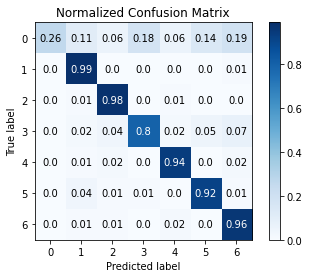

In [26]:
#Evaluation criteria

plot_roc(y_test, y_score2)
plt.savefig('ROCbaseRF.png')
plt.show()

target_names = ['Healthy', 'OHypo', 'OHyper', 'SHypo', 'SHyper', 'IHypo', 'IHyper']
print(classification_report(y_test, y_pred2, target_names=target_names))

RF = classification_report(y_test, y_pred2, target_names=target_names, output_dict=True)
RF = pd.DataFrame(RF).transpose()
print(np.unique(y_pred2))

RF.to_csv('RF_base.csv')
!cp RF_base.csv "drive/My Drive/"

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred2, normalize=True)
plt.savefig('CMbaseRF.png')
plt.show()

In [27]:
#Hyperparameter tuning

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score


rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=36)

rfgrid = { 
    'n_estimators': [50, 100, 200, 500],
    'max_features': [4, 6, 8, 10],
    'min_samples_split': [4, 6, 8]
}


#rf_grid = GridSearchCV(estimator=rf, param_grid=rfgrid, cv=rskf, refit=True, verbose=3, scoring = 'accuracy')
rf_grid = GridSearchCV(estimator=rf, param_grid=rfgrid, cv=rskf, refit=False, verbose=3, scoring = ['accuracy', 'roc_auc_ovr'])
rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV 1/10] END max_features=4, min_samples_split=4, n_estimators=50; accuracy: (test=0.980) roc_auc_ovr: (test=0.999) total time=   0.7s
[CV 2/10] END max_features=4, min_samples_split=4, n_estimators=50; accuracy: (test=0.980) roc_auc_ovr: (test=0.998) total time=   0.7s
[CV 3/10] END max_features=4, min_samples_split=4, n_estimators=50; accuracy: (test=0.967) roc_auc_ovr: (test=0.995) total time=   0.7s
[CV 4/10] END max_features=4, min_samples_split=4, n_estimators=50; accuracy: (test=0.978) roc_auc_ovr: (test=0.998) total time=   0.9s
[CV 5/10] END max_features=4, min_samples_split=4, n_estimators=50; accuracy: (test=0.977) roc_auc_ovr: (test=0.996) total time=   1.0s
[CV 6/10] END max_features=4, min_samples_split=4, n_estimators=50; accuracy: (test=0.975) roc_auc_ovr: (test=0.999) total time=   0.9s
[CV 7/10] END max_features=4, min_samples_split=4, n_estimators=50; accuracy: (test=0.979) roc_auc_ovr: (test=0.998) tota

KeyboardInterrupt: ignored

In [ ]:
rf_grid.best_params_

{'max_features': 4, 'min_samples_split': 4, 'n_estimators': 200}

In [ ]:
rf_grid.best_score_

0.9786075240698043

In [ ]:
import joblib

joblib.dump(rf_grid, 'drive/MyDrive/rf_grid')

['drive/MyDrive/rf_grid']

In [ ]:
rf_grid = joblib.load('drive/MyDrive/rf_grid')

SVM

In [ ]:
#Base SVM
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

svc = SVC(gamma='scale', decision_function_shape='ovr',probability=True)
#rbf=svc.fit(X_train, y_train)

#linear = SVC(kernel='linear', C=0.1, decision_function_shape='ovr').fit(X_train, y_train)
rbf = SVC(kernel='rbf', decision_function_shape='ovr',probability=True, gamma = 1, C = 10).fit(X_train, y_train) #Best hyperpar: gamma = 1, C = 10
#poly = SVC(kernel='poly', degree=3, C=0.1, decision_function_shape='ovr').fit(X_train, y_train)
#sig = SVC(kernel='sigmoid', C=0.1, decision_function_shape='ovr').fit(X_train, y_train)

#All other kernel tricks produced way lower accuracies

In [ ]:
#x = linear.predict(X_test)
#poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
y_scoreSVM = rbf.predict_proba(X_test)
#sig_pred = sig.predict(X_test)

In [ ]:
# retrieve the accuracy and print it for all 4 kernel functions
#accuracy_lin = linear.score(X_test, y_test)
#accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
#accuracy_sig = sig.score(X_test, y_test)
#print("Accuracy Linear Kernel:", accuracy_lin)
#print("Accuracy Poly Kernel:", accuracy_poly)
print("Accuracy RBF Kernel:", accuracy_rbf)
print("ROC-AUC score :", roc_auc_score(y_test, y_scoreSVM, multi_class='ovr'))
#print("Accuracy Sig Kernel:", accuracy_sig)

Accuracy RBF Kernel: 0.8916666666666667
ROC-AUC score : 0.4763135940049653


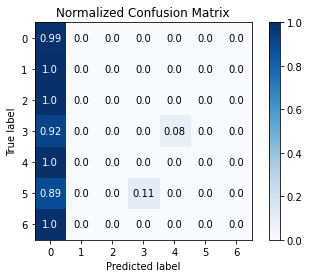

0.8916666666666667
Accuracy: 0.8916666666666667


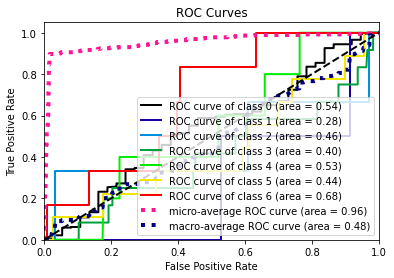

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[0 3 4 5]
              precision    recall  f1-score   support

     Healthy       0.90      0.99      0.95       323
       OHypo       0.00      0.00      0.00         2
      OHyper       0.00      0.00      0.00         3
       SHypo       0.00      0.00      0.00        12
      SHyper       0.00      0.00      0.00         5
       IHypo       0.00      0.00      0.00         9
      IHyper       0.00      0.00      0.00         6

    accuracy                           0.89       360
   macro avg       0.13      0.14      0.14       360
weighted avg       0.81      0.89      0.85       360



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
import random
random.seed(12)

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, rbf_pred, normalize=True)
plt.savefig('CMtunedSVM.png')
plt.show()

predSVM = rbf_pred #predictions
y_scoreSVM = rbf.predict_proba(X_test)
scoreSVM = rbf.score(X_test, y_test)
print(scoreSVM)
print('Accuracy:',accuracy_score(y_test, predSVM))

plot_roc(y_test, y_scoreSVM)
plt.savefig('ROCtunedSVM.png')
plt.show()

SVM = classification_report(y_test, predSVM, target_names=target_names, output_dict=True)
SVM = pd.DataFrame(SVM).transpose()
print(np.unique(predSVM))

SVM.to_csv('SVM_tune.csv')
!cp SVM_tune.csv "drive/My Drive/"

target_names = ['Healthy', 'OHypo', 'OHyper', 'SHypo', 'SHyper', 'IHypo', 'IHyper']
print(classification_report(y_test, predSVM, target_names=target_names))



In [ ]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=37)

# Defining parameter range
gridSVM = {'C': [0.01, 0.1, 1, 10, 100], 
              'gamma': [0.01, 0.1, 1, 10, 100],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']} 
  
grid_svm = GridSearchCV(SVC(decision_function_shape='ovr',probability=True), gridSVM, refit = True, verbose = 3, cv=rskf)
  
# fitting the model for grid search
grid_svm.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END ...C=0.01, gamma=0.01, kernel=rbf;, score=0.243 total time=  31.9s


KeyboardInterrupt: ignored

In [ ]:
grid_svm.best_params_ 

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

KNN

In [ ]:
#KNN Base

from sklearn.neighbors import KNeighborsClassifier

#knn=KNeighborsClassifier(algorithm='auto')
knn=KNeighborsClassifier(algorithm='brute',
 metric='manhattan',
 n_neighbors= 2,
 weights='distance')
x = knn.fit(X_train,y_train)
predknn=knn.predict(X_test)

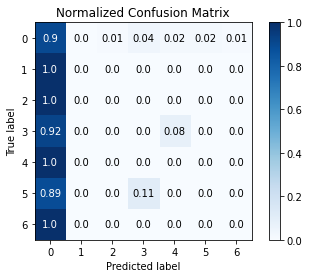

0.8083333333333333
Accuracy: 0.8083333333333333
ROC-AUC KNN : 0.4951030131346738


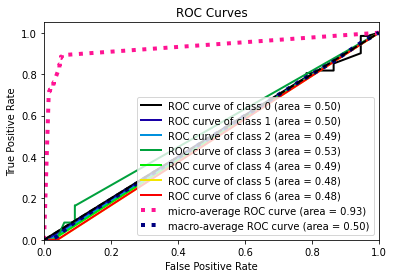

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

     Healthy       0.89      0.90      0.90       323
       OHypo       0.00      0.00      0.00         2
      OHyper       0.00      0.00      0.00         3
       SHypo       0.00      0.00      0.00        12
      SHyper       0.00      0.00      0.00         5
       IHypo       0.00      0.00      0.00         9
      IHyper       0.00      0.00      0.00         6

    accuracy                           0.81       360
   macro avg       0.13      0.13      0.13       360
weighted avg       0.80      0.81      0.80       360

[0 2 3 4 5 6]
Accuracy: 0.8083333333333333


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import random
random.seed(12)

import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, predknn, normalize=True)
plt.savefig('CMtuneKNN.png')
plt.show()

y_scoreknn = knn.predict_proba(X_test)
scoreknn = knn.score(X_test, y_test)
print(scoreknn)
print('Accuracy:',accuracy_score(y_test, predknn))
print('ROC-AUC KNN :', roc_auc_score(y_test, y_scoreknn, multi_class='ovr'))

plot_roc(y_test, y_scoreknn)
plt.savefig('ROCtuneKNN.png')
plt.show()

target_names = ['Healthy', 'OHypo', 'OHyper', 'SHypo', 'SHyper', 'IHypo', 'IHyper']
print(classification_report(y_test, predknn, target_names=target_names))

KNN = classification_report(y_test, predknn, target_names=target_names, output_dict=True)
KNN = pd.DataFrame(KNN).transpose()
print(np.unique(predknn))

KNN.to_csv('KNN_tune.csv')
!cp KNN_tune.csv "drive/My Drive/"

result2 = accuracy_score(y_test,predknn)
print("Accuracy:",result2)

In [ ]:
#Hyperparameter tuning

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

rskf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=38)
leaf_size = list(range(1,50))
n_neighbors = list(range(1,10))

# Defining parameter range
gridknn = {'n_neighbors' :  n_neighbors,
           'weights': ['uniform', 'distance'], 
           'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
           'metric' : ['manhattan', 'minkowski', 'euclidian']}
           
  
grid_knn = GridSearchCV(knn, gridknn, refit = True, verbose = 3, cv=rskf)
  
# fitting the model for grid search
grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
[CV 1/10] END algorithm=auto, metric=manhattan, n_neighbors=1, weights=uniform;, score=0.966 total time=   0.1s
[CV 2/10] END algorithm=auto, metric=manhattan, n_neighbors=1, weights=uniform;, score=0.961 total time=   0.1s
[CV 3/10] END algorithm=auto, metric=manhattan, n_neighbors=1, weights=uniform;, score=0.965 total time=   0.1s
[CV 4/10] END algorithm=auto, metric=manhattan, n_neighbors=1, weights=uniform;, score=0.956 total time=   0.1s
[CV 5/10] END algorithm=auto, metric=manhattan, n_neighbors=1, weights=uniform;, score=0.967 total time=   0.1s
[CV 6/10] END algorithm=auto, metric=manhattan, n_neighbors=1, weights=uniform;, score=0.966 total time=   0.1s
[CV 7/10] END algorithm=auto, metric=manhattan, n_neighbors=1, weights=uniform;, score=0.952 total time=   0.1s
[CV 8/10] END algorithm=auto, metric=manhattan, n_neighbors=1, weights=uniform;, score=0.958 total time=   0.1s
[CV 9/10] END algorithm=auto, metric=ma

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=10, random_state=38),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['manhattan', 'minkowski', 'euclidian'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [ ]:
grid_knn.best_params_ 

{'algorithm': 'brute',
 'metric': 'manhattan',
 'n_neighbors': 2,
 'weights': 'distance'}

In [ ]:
grid_knn.best_score_

0.9610939637031526